In [2]:
# %% ------------------- IMPORTS ------------------- #
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
# %% ------------------- PATHS ------------------- #
train_dir = r"D:\Military_Aircraft_CNN\Images\Train"
test_dir = r"D:\Military_Aircraft_CNN\Images\Test"   

In [ ]:
# %% ------------------- DATA GENERATORS ------------------- #
# Training generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,     # 20% split for validation
    horizontal_flip=True,
    rotation_range=25,
    zoom_range=0.2,
    shear_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),   # ResNet50 input size
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

In [ ]:
num_classes = train_generator.num_classes  # should be 81
print(f"Number of classes: {num_classes}")

In [ ]:
# %% ------------------- RESNET50 MODEL ------------------- #
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze pretrained layers
base_model.trainable = False

# Custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

In [ ]:
# %% ------------------- CALLBACKS ------------------- #
checkpoint = ModelCheckpoint(
    filepath="best_resnet50_military.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max"
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

Found 4536 images belonging to 81 classes.
Found 1134 images belonging to 81 classes.
Number of classes: 81


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,678,353 (94.14 MB)

 Trainable params: 1,090,641 (4.16 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

C:\Users\logan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0082 - loss: 4.7615

142/142 ━━━━━━━━━━━━━━━━━━━━ 514s 4s/step - accuracy: 0.0099 - loss: 4.6099 - val_accuracy: 0.0132 - val_loss: 4.3944
Epoch 2/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0157 - loss: 4.4435

142/142 ━━━━━━━━━━━━━━━━━━━━ 451s 3s/step - accuracy: 0.0134 - loss: 4.4341 - val_accuracy: 0.0220 - val_loss: 4.3843
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 459s 3s/step - accuracy: 0.0146 - loss: 4.4005 - val_accuracy: 0.0194 - val_loss: 4.3804
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 658s 5s/step - accuracy: 0.0183 - loss: 4.3873 - val_accuracy: 0.0123 - val_loss: 4.3758
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 364s 3s/step - accuracy: 0.0152 - loss: 4.3821 - val_accuracy: 0.0115 - val_loss: 4.3729
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 379s 3s/step - accuracy: 0.0152 - loss: 4.3791 - val_accuracy: 0.0185 - val_loss: 4.3697
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0219 - loss: 4.3726

142/142 ━━━━━━━━━━━━━━━━━━━━ 407s 3s/step - accuracy: 0.0196 - loss: 4.3716 - val_accuracy: 0.0265 - val_loss: 4.3670
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 389s 3s/step - accuracy: 0.0154 - loss: 4.3696 - val_accuracy: 0.0256 - val_loss: 4.3613
Epoch 9/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 460s 3s/step - accuracy: 0.0185 - loss: 4.3612 - val_accuracy: 0.0150 - val_loss: 4.3579
Epoch 10/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 461s 3s/step - accuracy: 0.0194 - loss: 4.3634 - val_accuracy: 0.0247 - val_loss: 4.3504
Epoch 11/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 458s 3s/step - accuracy: 0.0227 - loss: 4.3530 - val_accuracy: 0.0229 - val_loss: 4.3460
Epoch 12/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0248 - loss: 4.3528

142/142 ━━━━━━━━━━━━━━━━━━━━ 417s 3s/step - accuracy: 0.0218 - loss: 4.3527 - val_accuracy: 0.0273 - val_loss: 4.3442
Epoch 13/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 461s 3s/step - accuracy: 0.0234 - loss: 4.3465 - val_accuracy: 0.0265 - val_loss: 4.3406
Epoch 14/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 461s 3s/step - accuracy: 0.0198 - loss: 4.3472 - val_accuracy: 0.0265 - val_loss: 4.3369
Epoch 15/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.0238 - loss: 4.3379 

142/142 ━━━━━━━━━━━━━━━━━━━━ 2507s 18s/step - accuracy: 0.0236 - loss: 4.3400 - val_accuracy: 0.0309 - val_loss: 4.3357
Epoch 16/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 388s 3s/step - accuracy: 0.0238 - loss: 4.3377 - val_accuracy: 0.0291 - val_loss: 4.3302
Epoch 17/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0289 - loss: 4.3339

142/142 ━━━━━━━━━━━━━━━━━━━━ 407s 3s/step - accuracy: 0.0249 - loss: 4.3346 - val_accuracy: 0.0344 - val_loss: 4.3236
Epoch 18/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 453s 3s/step - accuracy: 0.0231 - loss: 4.3283 - val_accuracy: 0.0291 - val_loss: 4.3249
Epoch 19/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 414s 3s/step - accuracy: 0.0212 - loss: 4.3293 - val_accuracy: 0.0309 - val_loss: 4.3211
Epoch 20/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 406s 3s/step - accuracy: 0.0251 - loss: 4.3247 - val_accuracy: 0.0282 - val_loss: 4.3183
36/36 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step


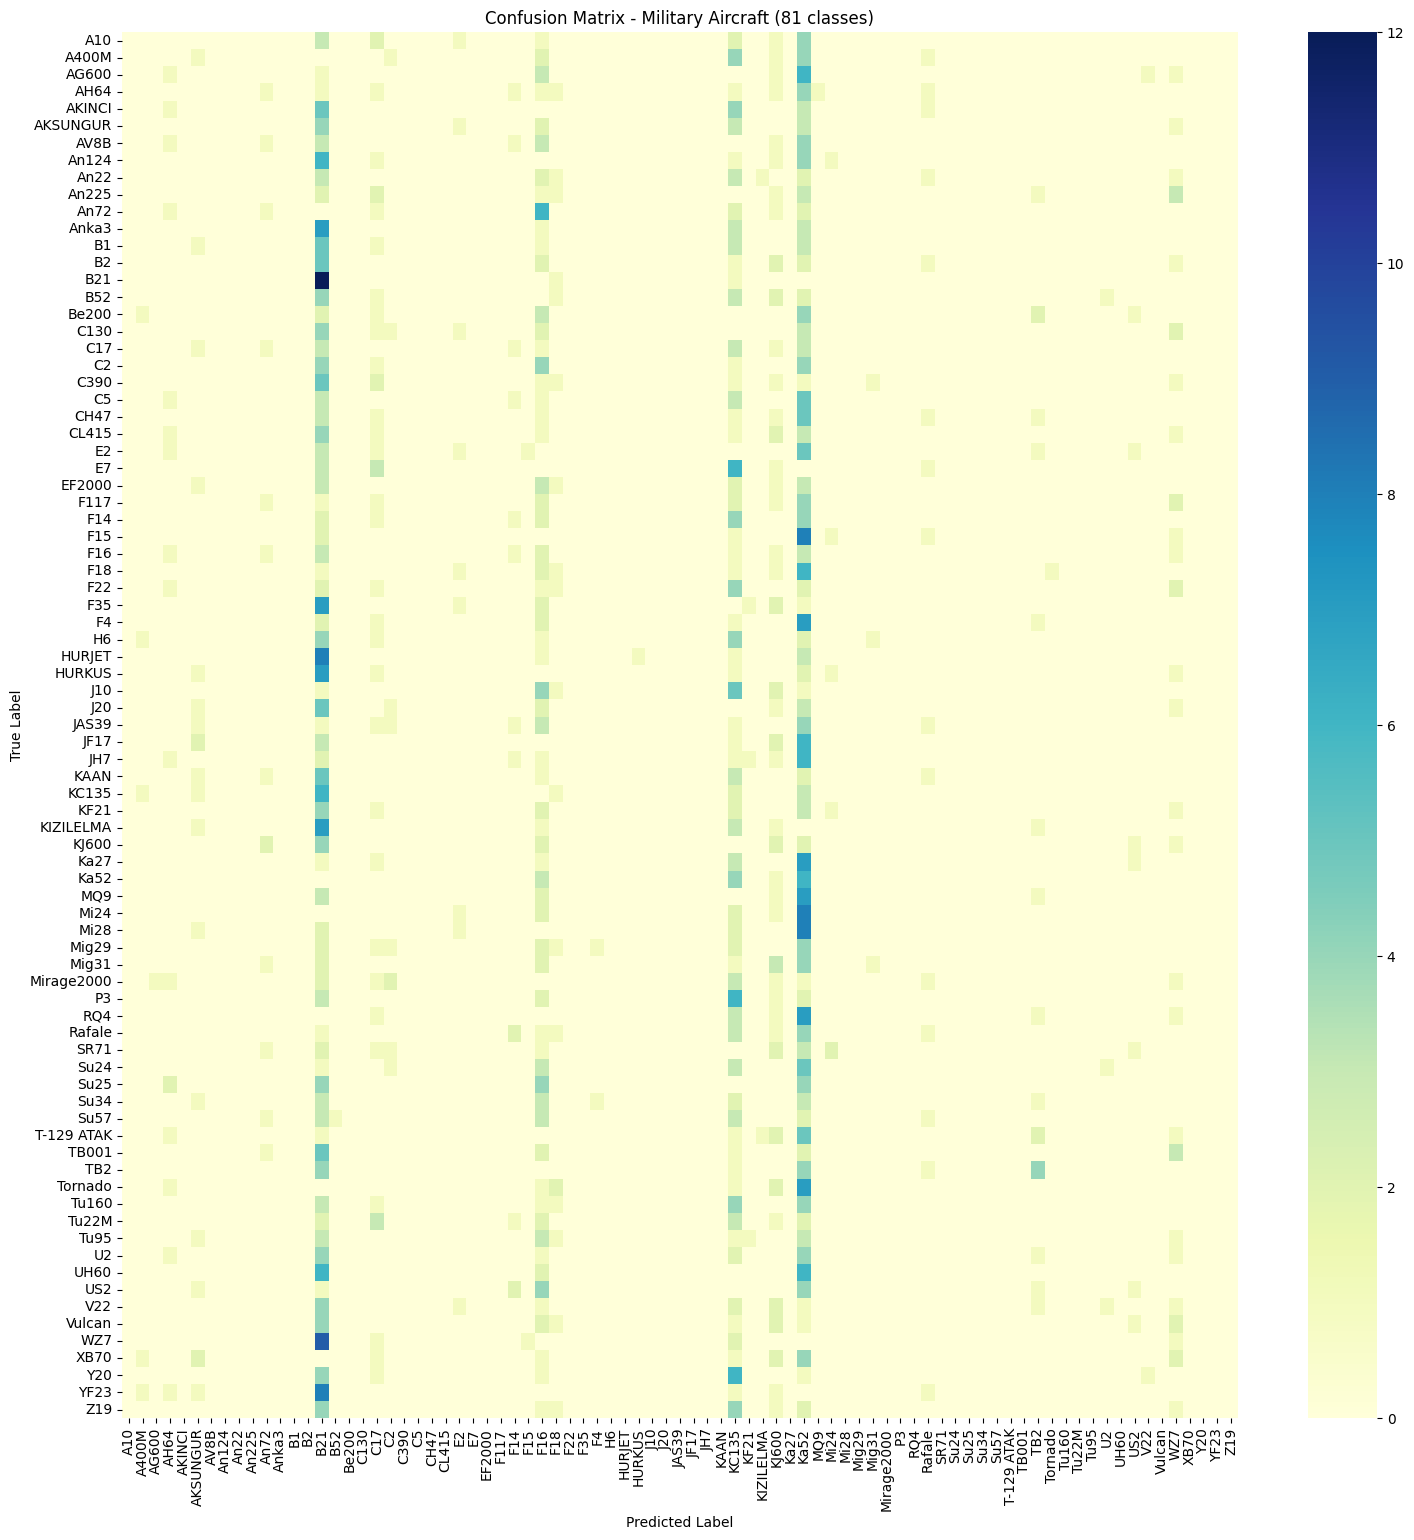

In [ ]:
# %% ------------------- TRAINING ------------------- #
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[checkpoint, early_stopping]
)